In [1]:
# %load_ext nb_black

import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings("ignore")
randomseed = 7

Using TensorFlow backend.


In [2]:
data1 = pd.read_csv("NextYearData_actualData_train.txt")
data2 = pd.read_csv("ThisYearData_actualData_train.txt")
data3 = pd.read_csv("ThisYearData_actualData_test.txt")

data4 = pd.read_csv("NextYearData_actualData_test.txt")

data5 = pd.read_csv("Predicted_NextYearData.txt")

data = pd.concat([data1, data2, data3])

print(data.shape)
data.head()

(70592, 18)


,Unnamed: 0,FIELD_1,FIELD_2,L100700,S000300,L101700,L100800,L103300,L103100,FIELD_33,FIELD_38,FIELD_40,SEX,AGE,L102900,L103200,L103000,CLASS
0,0,696760,20150404,3.8,24.3,13.0,96.0,3.5,56.0,1.0,0.0,0.0,1.0,39.0,194.0,120.0,89.0,0
1,1,819364,20150923,4.8,26.2,13.0,92.0,5.2,41.0,1.0,0.0,0.0,1.0,43.0,212.0,136.0,173.0,1
2,2,816630,20170928,7.4,21.8,21.0,108.0,2.7,87.0,2.0,3.0,0.0,0.0,45.0,237.0,135.0,74.0,1
3,3,3869001,20161109,4.1,25.1,32.0,90.0,5.1,43.0,3.0,3.0,0.0,0.0,47.0,220.0,132.0,224.0,1
4,4,2853000,20161121,2.6,19.5,12.0,89.0,4.8,51.0,1.0,0.0,0.0,1.0,38.0,245.0,156.0,189.0,1


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])

In [17]:
data=data[['L100700','S000300','L101700','L100800','L103300','L103100','FIELD_33','FIELD_38','FIELD_40','SEX','AGE','CLASS']]
xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], random_state=42, test_size=0.3)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=1000,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=8,
)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

0.8607517234866371


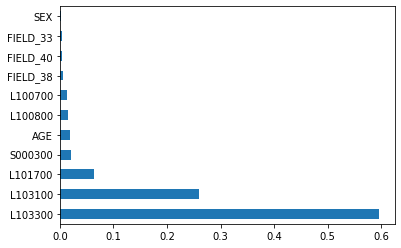

Index(['L103300', 'L103100', 'L101700', 'S000300', 'AGE', 'L100800', 'L100700',
       'FIELD_38', 'FIELD_40', 'FIELD_33', 'SEX'],
      dtype='object')


In [19]:
ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=xtest.columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [20]:
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.880
Accuracy on test set: 0.861


,0,1
0,8109,1394
1,1555,10120


In [21]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      9503
           1       0.88      0.87      0.87     11675

    accuracy                           0.86     21178
   macro avg       0.86      0.86      0.86     21178
weighted avg       0.86      0.86      0.86     21178



In [22]:
# import xgboost as xgb
# from sklearn import metrics as m

# xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

# xgb_model.fit(xtrain, ytrain)

# y_pred = xgb_model.predict((xtest))

# print("accuracy \t", m.accuracy_score(ytest, y_pred))
# confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
# confmatrx.head()

In [23]:
# print(classification_report(ytest, y_pred))

In [28]:
data4=data4[['L100700','S000300','L101700','L100800','L103300','L103100','FIELD_33','FIELD_38',
             'FIELD_40','SEX','AGE','CLASS']]

data4.iloc[:, :-1]=scaler.transform(data4.iloc[:, :-1])
pred4 = rf.predict((data4.iloc[:, :-1]))

print(m.accuracy_score(data4.iloc[:, -1], pred4))

confmatrx = pd.DataFrame(m.confusion_matrix(data4.iloc[:, -1], pred4))
confmatrx

0.9211751484989565


,0,1
0,5076,474
1,508,6400


In [29]:
print(classification_report(data4.iloc[:, -1], pred4))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5550
           1       0.93      0.93      0.93      6908

    accuracy                           0.92     12458
   macro avg       0.92      0.92      0.92     12458
weighted avg       0.92      0.92      0.92     12458



In [30]:
# =====================================
# =====================================
# =====================================
# =====================================

data5=data5[['P_L100700','P_S000300','P_L101700','P_L100800','P_L103300','P_L103100','P_FIELD_33','P_FIELD_38',
             'P_FIELD_40','P_SEX','P_AGE','CLASS']]


data5.iloc[:, :-1]=scaler.transform(data5.iloc[:, :-1])

pred5 = rf.predict((data5.iloc[:, :-1]))



print(m.accuracy_score(data5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(data5.iloc[:, -1], pred5))
confmatrx

0.7804623535077861


,0,1
0,3973,1577
1,1158,5750


In [31]:
print(classification_report(data5.iloc[:, -1], pred5))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5550
           1       0.78      0.83      0.81      6908

    accuracy                           0.78     12458
   macro avg       0.78      0.77      0.78     12458
weighted avg       0.78      0.78      0.78     12458



In [12]:
# ========================================================

In [39]:
import pickle

with open('HyperlipidemiaModelClassifierModelForNextYear_rf_model', 'wb') as f:
    pickle.dump(rf, f)

In [40]:
with open('HyperlipidemiaClassifierModelForNextYear_scaler_SMOTE', 'wb') as f:
    pickle.dump(scaler, f)

In [32]:
# print(xtrain.shape)

In [33]:
# print(xtest.shape)

In [34]:
# data5.shape

In [35]:
# data.to_csv('_train.txt',sep=',')

In [36]:
# data4.to_csv('_test.txt',sep=',')

In [37]:
# data5.to_csv('_PredictedNextYearTest.txt',sep=',')

In [38]:
# data4.head()